In [75]:
import utils.constants as const
import utils.pathbuilder as upb
import os
import random
from PIL import Image
import numpy as np
from skimage import transform
from matplotlib.pyplot import imshow
%matplotlib inline

In [76]:
images = ['01.png', '02.png', '03.png', '04.png']

In [77]:
converted = ['[GS]01.png', '[GS]02.png', '[GS]03.png', '[GS]04.png']

In [78]:
for image in images:
    with Image.open(image) as img:
        img = img.convert('LA').convert('RGB')
        arr = np.asarray(img)
        if arr.mean() > 255 / 2:
            arr = 255 - arr
        newImage = Image.fromarray(arr)
        newImage.save("[GS]" + image)

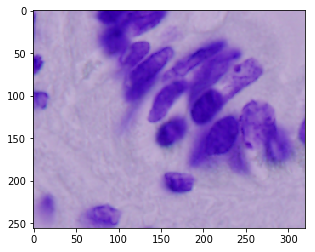

In [79]:
image = images[0]
img = Image.open(image)
imshow(np.asarray(img))
img.close()

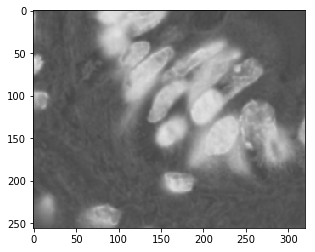

In [80]:
image = converted[0]
img = Image.open(image)
imshow(np.asarray(img))
img.close()

In [117]:
def data_aug(image,angel=30,resize_rate=0.9):
    flip = random.randint(0, 1)
    size = image.size[0]
    rsize = random.randint(np.floor(resize_rate*size),size)
    w_s = random.randint(0,size - rsize)
    h_s = random.randint(0,size - rsize)
    sh = random.random()/2-0.25
    rotate_angel = random.random()/180*np.pi*angel
    # Create Afine transform
    afine_tf = transform.AffineTransform(shear=sh,rotation=rotate_angel)
    # Apply transform to image data
    image = transform.warp(image, inverse_map=afine_tf,mode='edge')
    # Randomly corpping image frame
    image = image[w_s:w_s+size,h_s:h_s+size,:]
    # Ramdomly flip frame
    if flip:
        image = image[:,::-1,:]

    return image

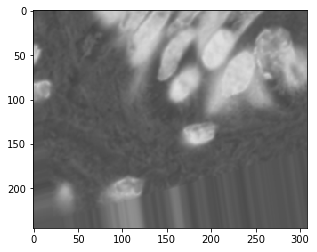

In [125]:
image = converted[0]
img = Image.open(image)
imshow(np.asarray(data_aug(img)))
img.close()